# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

## Projeto nº 2

### Professor: Ahirton Lopes (Machine Learning: Aula 2) -- https://github.com/ahirtonlopes/Mastering-Machine-Learning

#### Aprendizagem Supervisionada e Regressão Linear (Desafio extra utilizando Árvore de Decisão ao final)

Exercício para prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. O foco é apenas entender a aplicação do modelo, portanto o notebook não contém um aprofundamento no EDA e nem em técnicas de Feature Engineering.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
data = pd.read_csv('boston.csv', sep=';', decimal=',')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Charles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PT'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MV'}>, <Axes: >, <Axes: >]], dtype=object)

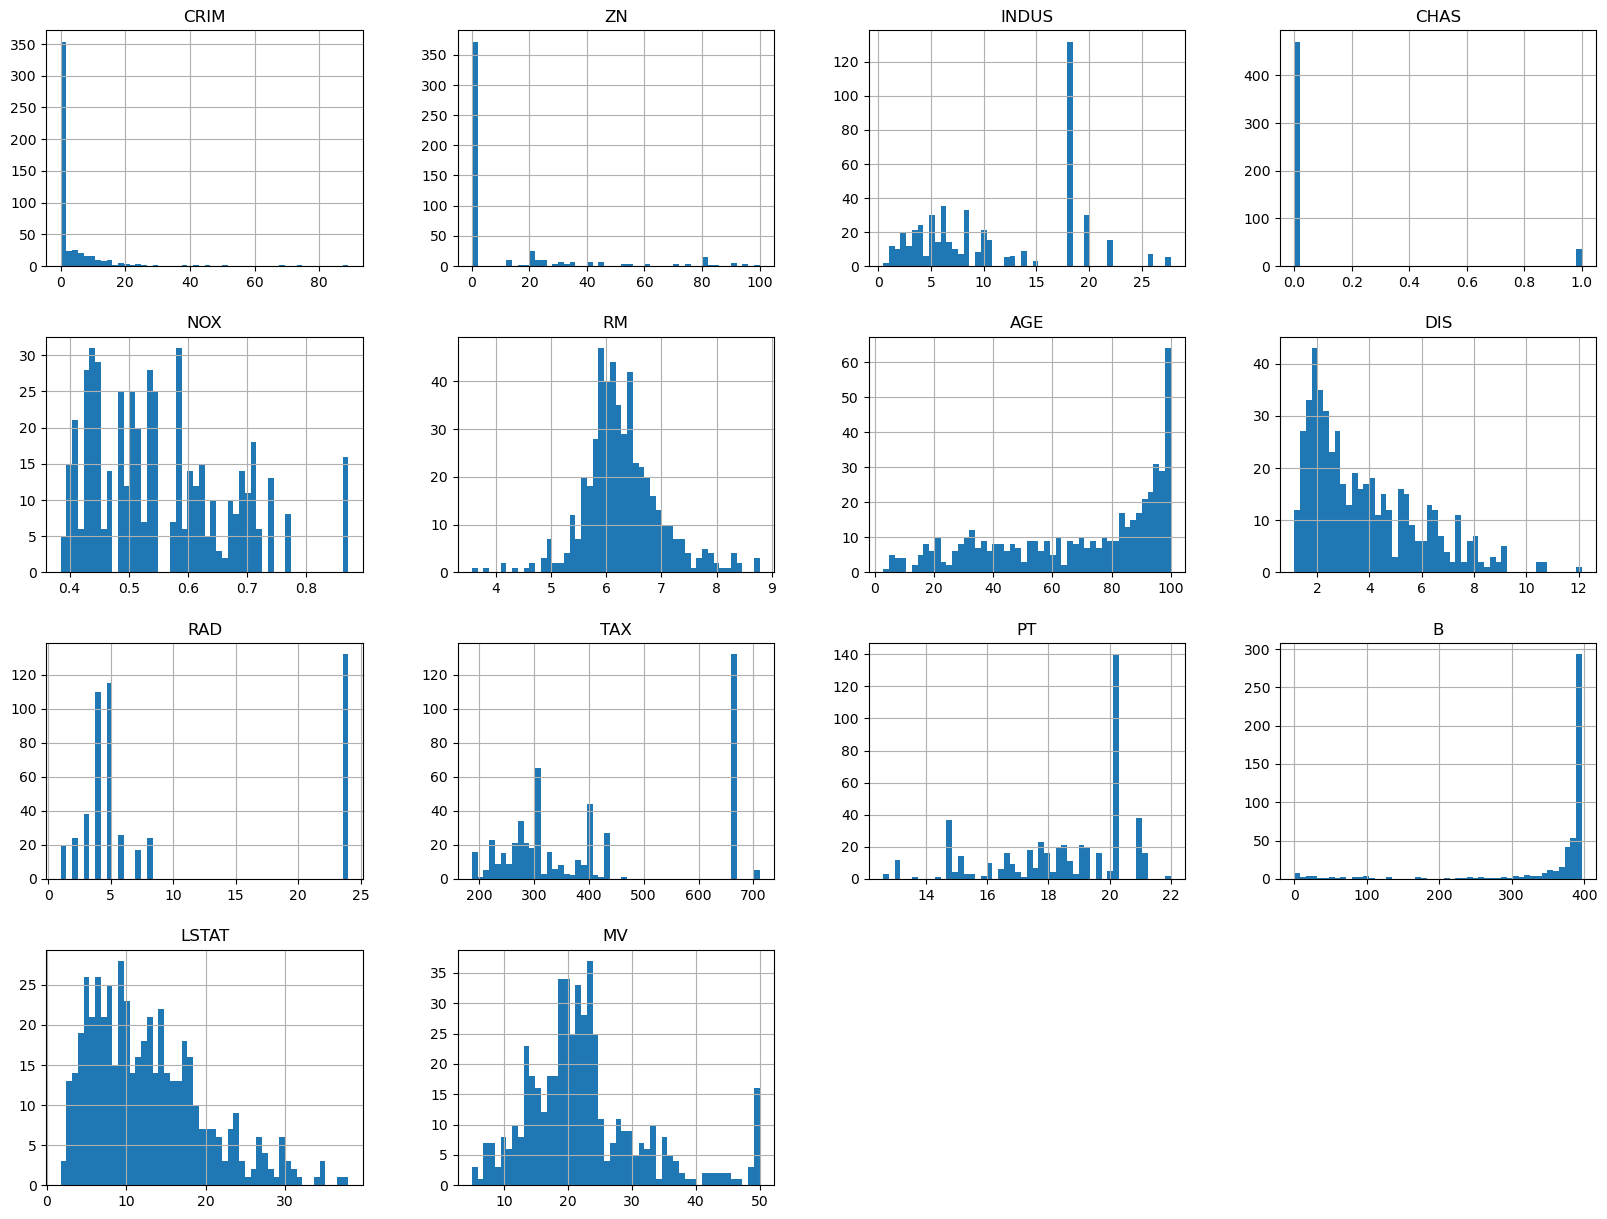

In [6]:
data.hist(bins=50, figsize=(20,15))

Agora estarei aplicando a regressão linear.
Varável dependente (y) / Variáveis independentes (X)

In [7]:
X = data.drop('MV', axis=1)
y = data['MV']

In [8]:
def evaluate_model_LR(cv):

  model = LinearRegression()

  r2 = cross_val_score(model, X, y, cv=cv, scoring='r2')

  return r2

In [9]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_LR(cv))

-> folds=2,  [0.64660095 0.73172347]
-> folds=3,  [0.66556208 0.72640009 0.73787769]
-> folds=4,  [0.63674325 0.72113006 0.77559439 0.70914771]
-> folds=5,  [0.7510635  0.75048361 0.64028308 0.67233518 0.71786771]
-> folds=6,  [0.71614632 0.7171293  0.7246664  0.75220975 0.72498122 0.6801158 ]
-> folds=7,  [0.61147376 0.75305644 0.63908861 0.76853511 0.69950755 0.76075612
 0.79211701]
-> folds=8,  [0.7935583  0.81334068 0.65397932 0.68776441 0.71327577 0.57122152
 0.66142731 0.72441332]
-> folds=9,  [0.75809237 0.69671051 0.60377461 0.76617632 0.75542858 0.68170272
 0.68009194 0.63124319 0.79335188]
-> folds=10,  [0.69004611 0.70766704 0.81529377 0.68055805 0.8301344  0.77558717
 0.47008867 0.72376044 0.61882908 0.68583149]


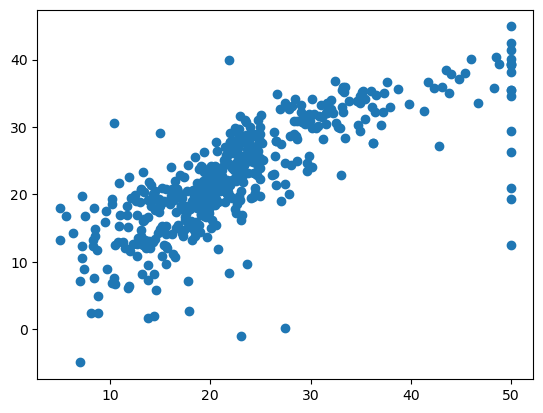

In [10]:
cv_prediction_LR = cross_val_predict(LinearRegression(), X, y, cv=10)
plt.scatter(y, cv_prediction_LR)

In [11]:
rmse = mean_squared_error(y, cv_prediction_LR, squared=False)
print(f'RMSE: {rmse}')

RMSE: 5.877045184485979


Tentando prever o valor de um novo exemplo

In [12]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421,
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [13]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [14]:
lr.predict(x_new)

array([25.02556341])

Passando uma lista de valores de uma única vez para previsão

In [15]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2,
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3,
          432,  9.546666, 342.435664, 3.23],
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5,
          567, 15.898006, 224.655678, 5.84]]

In [16]:
lr.predict(X_new)

array([25.02556341, 22.96398145, 27.65635662])

Visualizando os coeficientes da reta para cada atributo

In [17]:
lr.coef_

array([-1.08011353e-01,  4.64204559e-02,  2.05586761e-02,  2.68673389e+00,
       -1.77666149e+01,  3.80986498e+00,  6.92223926e-04, -1.47556679e+00,
        3.06049515e-01, -1.23345932e-02, -9.52747256e-01,  9.31168341e-03,
       -5.24758397e-01])

E o valor do bias

In [18]:
lr.intercept_

36.45949145783358

Calculando o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [19]:
mse = mean_squared_error(y, cv_prediction_LR)
print(f'MSE: {mse}')

MSE: 34.53966010048983



**[Desafio]** Adaptar para uso de alguma técnica de árvore de decisão (ex. scikitlearn - https://scikit-learn.org/stable/modules/tree.html)

In [20]:
def evaluate_model_DT(cv):

  model = DecisionTreeRegressor()

  scores = cross_val_score(model, X, y, cv=cv)

  return scores

In [21]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_DT(cv))

-> folds=2,  [0.68236532 0.65577884]
-> folds=3,  [0.77429706 0.66300079 0.80314131]
-> folds=4,  [0.62651783 0.85854458 0.82987191 0.73090016]
-> folds=5,  [0.81483817 0.76929    0.73452714 0.77380881 0.77152898]
-> folds=6,  [0.75356053 0.77082523 0.62559729 0.85694414 0.80351369 0.84419457]


-> folds=7,  [0.67864835 0.83935959 0.87452934 0.76068377 0.79807064 0.60083134
 0.78323799]
-> folds=8,  [0.89021323 0.67643992 0.74701384 0.79300197 0.83083458 0.31882179
 0.8014937  0.79282412]
-> folds=9,  [0.51371103 0.64756919 0.8997561  0.78807129 0.79423201 0.84311768
 0.73969477 0.81920505 0.82740437]
-> folds=10,  [0.39556262 0.85028756 0.89676906 0.87579031 0.79362105 0.27728464
 0.8024787  0.78863483 0.72832178 0.52898549]


In [22]:
cv_prediction_DT = cross_val_predict(DecisionTreeRegressor(), X, y, cv=10)

In [23]:
mse = mean_squared_error(y, cv_prediction_DT)
print(f'MSE: {mse}')

MSE: 45.78191720254246


In [24]:
rmse = mean_squared_error(y, cv_prediction_DT, squared=False)
print(f'RMSE: {rmse}')

RMSE: 6.766233605377696


In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)

DecisionTreeRegressor()

In [26]:
dtr.predict(X_new)

array([21.60000038, 27.        , 21.89999962])